In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import ipywidgets as widgets
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler as normalizer
from ipywidgets import interact, interactive
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label

output_notebook()
plt.rcParams['figure.figsize'] = [15, 8]
proc_data = "../data/processed/covid/"

Loading BokehJS ...

In [2]:
covid = pd.read_csv(proc_data+"owid-covid-proc.csv", index_col=None, parse_dates=['date'],
                   usecols=['iso_code', 'date', 'new_cases','new_deaths', 'new_tests', 
                            'population', 'total_cases', 'total_tests'])
policy = pd.read_csv(proc_data+"policy_data.csv", index_col='record_id', 
                     parse_dates=['date_announced','date_start','date_end'])
loc = pd.read_csv(proc_data+"allvars_location.csv", index_col='record_id', usecols=['record_id', 'ISO_A3'])
policy = policy.join(loc, on='record_id', how='left')

In [3]:
covid

,iso_code,date,total_cases,new_cases,new_deaths,new_tests,total_tests,population
0,AFG,2019-12-31,0.0,0.0,0.0,NaN,NaN,38928341.0
1,AFG,2020-01-01,0.0,0.0,0.0,NaN,NaN,38928341.0
2,AFG,2020-01-02,0.0,0.0,0.0,NaN,NaN,38928341.0
3,AFG,2020-01-03,0.0,0.0,0.0,NaN,NaN,38928341.0
4,AFG,2020-01-04,0.0,0.0,0.0,NaN,NaN,38928341.0
...,...,...,...,...,...,...,...,...
48800,INT,2020-10-04,696.0,NaN,NaN,NaN,NaN,NaN
48801,INT,2020-10-05,696.0,NaN,NaN,NaN,NaN,NaN
48802,INT,2020-10-06,696.0,NaN,NaN,NaN,NaN,NaN
48803,INT,2020-10-07,696.0,NaN,NaN,NaN,NaN,NaN


In [4]:
policy = policy.drop(['update_level', 'target_geog_level','target_province','target_city', 'target_direction'], axis=1)

In [5]:
policy

,policy_id,update_type,date_announced,date_start,date_end,init_country_level,domestic_policy,type,type_sub_cat,type_text,school_status,ISO_A3
record_id,,,,,,,,,,,,
R_1gShvNnZtOkb4X1NA,3553952,NaN,2020-01-22,2020-01-22,NaT,National,False,Health Monitoring,NaN,NaN,NaN,BHR
R_3GrLmE8y71iEe17NA,2408864,NaN,2020-01-22,2020-01-22,NaT,National,False,Public Awareness Measures,NaN,NaN,NaN,BRB
R_1Hi5XBHB1zBOJc7NA,5424670,NaN,2020-01-22,2020-01-22,NaT,National,True,Health Monitoring,NaN,NaN,NaN,CAN
R_3EQBDJGMTKwowKOAq,2272584,NaN,2020-01-22,2020-01-22,NaT,National,False,Public Awareness Measures,Disseminating information related to COVID-19 ...,NaN,NaN,CHN
R_1OoGDBSpbZQ02oANA,5468900,NaN,2020-01-22,2020-01-22,NaT,Municipal,False,Hygiene,NaN,NaN,NaN,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...
R_1K0WUazA1VYYZxVNA,9940508,NaN,2020-05-11,2020-05-11,NaT,National,False,Health Monitoring,NaN,NaN,NaN,NRU
R_3fPEv3U7VviQZonNA,9950598,NaN,2020-02-11,2020-02-11,NaT,National,False,Anti-Disinformation Measures,NaN,NaN,NaN,PRK
R_2CBB0gC43BX2UJcBs,9973974,NaN,2020-04-21,2020-04-21,NaT,National,False,Health Resources,Masks,NaN,NaN,NaN


In [6]:
policy.type.dropna().unique()

array(['Health Monitoring', 'Public Awareness Measures', 'Hygiene',
       'Other Policy Not Listed Above', 'Health Resources',
       'New Task Force, Bureau or Administrative Configuration',
       'External Border Restrictions', 'Internal Border Restrictions',
       'Restrictions of Mass Gatherings',
       'Closure and Regulation of Schools',
       'Restriction and Regulation of Businesses',
       'Restriction and Regulation of Government Services',
       'Declaration of Emergency', 'Quarantine', 'Health Testing',
       'Social Distancing', 'Lockdown', 'Anti-Disinformation Measures',
       'Curfew'], dtype=object)

In [65]:
trim = re.compile("\(.*\)")
def vc(df):
    n = df.name
    df = df.fillna('None')
    c = df.type_sub_cat.value_counts().rename(n)
    c.index = c.index.str.replace(trim, "")
    c['total'] = c.sum()
    display(c.sort_values().to_frame())

In [67]:
policy.groupby('type').apply(vc);

,Anti-Disinformation Measures
None,145
total,145


,Closure and Regulation of Schools
None,2
Higher education institutions,772
Preschool or childcare facilities,867
Primary Schools,1151
Secondary Schools,1202
total,3994


,Curfew
None,382
total,382


,Declaration of Emergency
None,656
total,656


,External Border Restrictions
Visa extensions,29
Health Certificates,92
Visa restrictions,141
Travel History Form,193
Health Screenings,215
Other External Border Restriction,405
None,722
total,1797


,Health Monitoring
None,723
total,723


,Health Resources
None,26
Vaccines,30
Health Insurance,44
Health Research Facilities,75
Medicine/Drugs,83
Health Volunteers,89
Hand Sanitizer,136
Unspecified Health Infrastructure,140
Temporary Quarantine Centers,145
Temporary Medical Centers,172


,Health Testing
None,731
total,731


,Hygiene
Burial procedures,20
Hygiene measures for commercial areas,85
Hygiene measures for public areas,127
Other Areas Hygiene Measures Applied,131
None,164
total,527


,Internal Border Restrictions
None,826
total,826


,Lockdown
Lockdown only applies to people with a condition not specified above,3
Lockdown only applies to people with certain health conditions,4
Lockdown only applies to people of certain ages,13
Lockdown applies to all people,48
None,626
total,694


,"New Task Force, Bureau or Administrative Configuration"
Cooperation among different jurisdictional entities,1
Other Administrative Configurations,58
Existing government entity given new powers,118
New Task Force or Bureau,294
None,322
total,793


,Other Policy Not Listed Above
None,1605
total,1605


,Public Awareness Measures
Gathering information related to COVID-19 from the public,31
Both Disseminating and Gathering information related to COVID-19,83
None,534
Disseminating information related to COVID-19 to the public that is reliable and factually accurate,535
total,1183


,Quarantine
None,12
Quarantine only applies to people of certain ages. Please note the age restrictions in the text box.,36
Quarantine outside the home or government facility,115
Other Quarantine,157
Government Quarantine,374
Self-Quarantine,1101
total,1795


,Restriction and Regulation of Businesses
Water supply; sewerage; waste management and remediation activities,6
Insurance; reinsurance; and pension funding except compulsory social security,14
Mining and quarrying,15
Information service activities,20
Warehousing and support activities for transportation,20
Publishing activities,21
Telecommunications,22
None,33
Agriculture; forestry and fishing,37
Construction,39


,Restriction and Regulation of Government Services
Annually recurring event allowed to occur with certain conditions,1
Transportation,1
New Task Force or Bureau,1
Regulations on publicly provided waste management services,2
Other Non-Essential Businesses,2
Non-Essential Commercial Businesses,3
Unspecified outdoor spaces,5
Campsites,11
Election procedures,28
Tourist Sites,29


,Restrictions of Mass Gatherings
Prison population reduced,15
Events at private residencies restricted,29
Other mass gatherings not specified above restricted,30
Postponement of an annually recurring event,46
Annually recurring event allowed to occur with certain conditions,47
Postponement of a recreational or commercial event,65
Cancellation of an annually recurring event,98
Attendance at religious services restricted,215
Cancellation of a recreational or commercial event,225
None,930


,Social Distancing
Wearing masks,1
Restrictions ridership of other forms of public transportation,25
Restrictions on private vehicles in public circulation,36
Unspecified Mask Wearing Policy,36
Restrictions on ridership of trains,39
Restrictions on ridership of subways and trams,40
Restrictions on ridership of buses,50
Wearing Masks inside public or commercial building,99
Wearing Masks in all public spaces/everywhere,159
Other Mask Wearing Policy,198


In [9]:
covid_usa = covid.loc[covid.iso_code=='USA'].drop('iso_code', axis=1).set_index('date')
covid_usa

,total_cases,new_cases,new_deaths,new_tests,total_tests,population
date,,,,,,
2019-12-31,0.0,0.0,0.0,NaN,NaN,331002647.0
2020-01-01,0.0,0.0,0.0,NaN,NaN,331002647.0
2020-01-02,0.0,0.0,0.0,NaN,NaN,331002647.0
2020-01-03,0.0,0.0,0.0,NaN,NaN,331002647.0
2020-01-04,0.0,0.0,0.0,NaN,NaN,331002647.0
...,...,...,...,...,...,...
2020-10-04,7382944.0,50659.0,678.0,NaN,NaN,331002647.0
2020-10-05,7417845.0,34901.0,400.0,NaN,NaN,331002647.0
2020-10-06,7458550.0,40705.0,398.0,NaN,NaN,331002647.0


In [10]:
week_grp = pd.Grouper(freq='W')

In [11]:
covid_usa = covid_usa.groupby(week_grp).agg({'new_cases': 'sum', 'new_tests': 'sum', 'population':'mean'})

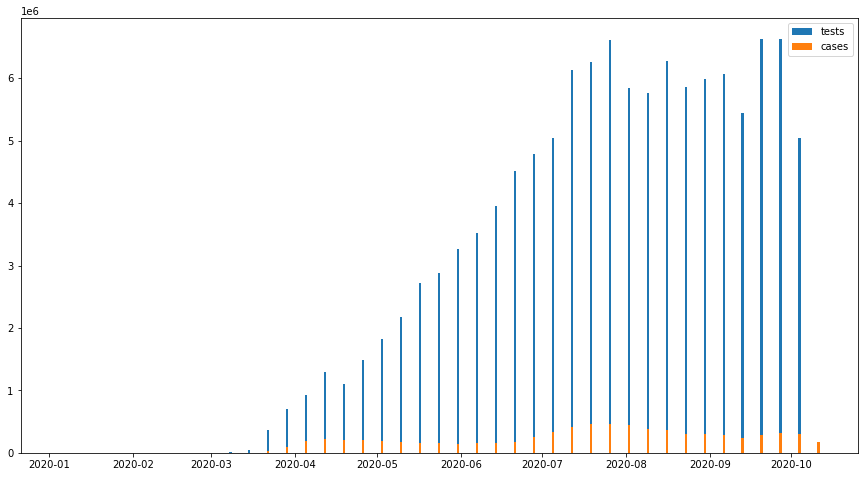

In [12]:
plt.bar(covid_usa.index, covid_usa.new_tests)
plt.bar(covid_usa.index, covid_usa.new_cases)
plt.legend(['tests', 'cases'])
plt.show()

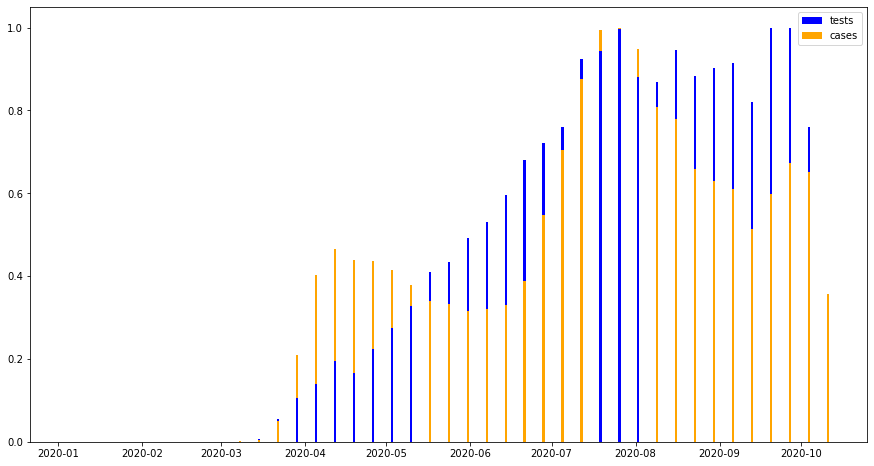

In [13]:
norm = normalizer()
tests = pd.Series(norm.fit_transform(covid_usa.new_tests.values.reshape(-1,1)).flatten(), index=covid_usa.index)
cases = pd.Series(norm.fit_transform(covid_usa.new_cases.values.reshape(-1,1)).flatten(), index=covid_usa.index)

mask1 = tests>cases
mask2 = cases>=tests


plt.bar(tests.index[mask1], tests[mask1], color='b')
plt.bar(cases.index, cases, color='orange')
plt.bar(tests.index[mask2], tests[mask2], color='b')
plt.legend({'tests':'b', 'cases':'orange'})
plt.show()

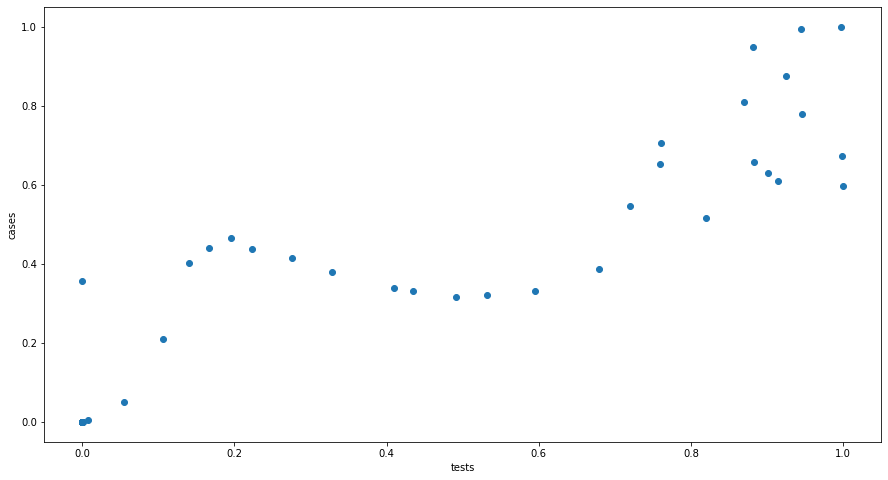

In [14]:
s = pd.concat([tests, cases], axis=1).dropna().rename(columns={0:'tests', 1:'cases'})
plt.scatter(s.tests.values, s.cases.values)
plt.xlabel("tests")
plt.ylabel('cases')
plt.show()

In [15]:
tests_p_t = covid_usa.new_tests / (covid_usa.population/1000)
cases_p_t = covid_usa.new_cases / (covid_usa.population/1000)
covid_usa_pt = pd.DataFrame({'tests':tests_p_t, 'cases':cases_p_t})
covid_usa_ptn = covid_usa_pt.transform(lambda x: pd.Series(normalizer().fit_transform(x.values.reshape(-1,1)).flatten(), index=x.index))
covid_usa_ptn['ratio'] = cases_p_t/tests_p_t

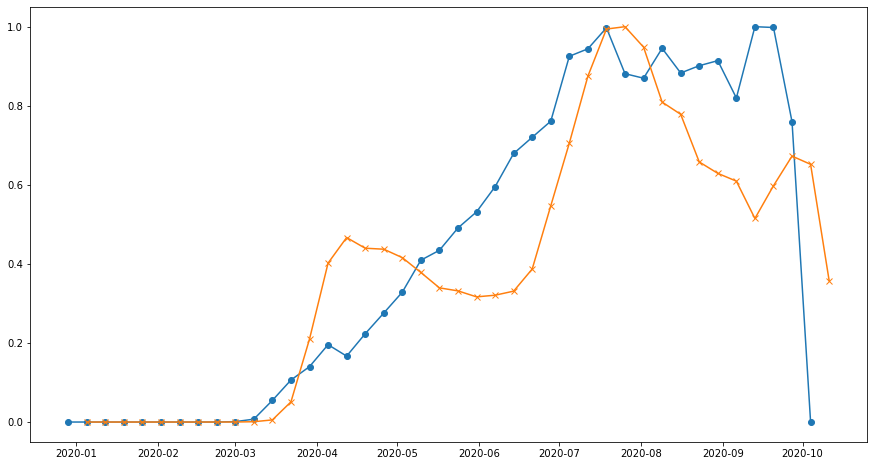

In [16]:
plt.plot(covid_usa_ptn['tests'].shift(-1, freq='W'), marker='o')
plt.plot(covid_usa_ptn['cases'], marker='x');

In [17]:
start = covid_usa_ptn.index.min()
stop = covid_usa_ptn.index.max()
policy_usa = policy.loc[policy.ISO_A3=='USA'][['type', 'type_sub_cat', 'date_announced', 'date_start', 'date_end']]

In [18]:
policy_usa = policy_usa.loc[(policy_usa.date_announced>start) & (policy_usa.date_announced<stop)]

In [19]:
policy_usa

,type,type_sub_cat,date_announced,date_start,date_end
record_id,,,,,
R_3I9x0DQ8VYXqyIcNA,Health Monitoring,NaN,2020-01-22,2020-01-22,NaT
R_6xmbSctmqkjMA4VAq,Public Awareness Measures,Disseminating information related to COVID-19 ...,2020-01-23,2020-01-23,NaT
R_3HYstneCw7PlFabNA,Public Awareness Measures,NaN,2020-01-24,2020-01-24,NaT
R_2Sph5l7qOwVbxv5NA,Public Awareness Measures,NaN,2020-01-24,2020-01-24,NaT
R_2y7MdTX5WXoiVVTNA,Public Awareness Measures,NaN,2020-01-26,2020-01-26,NaT
...,...,...,...,...,...
R_2P8eiAj1XV8KoopNA,Health Testing,NaN,2020-07-06,2020-08-13,2020-08-20
R_1gdyC25xLGlP5H1Bv,"New Task Force, Bureau or Administrative Confi...",New Task Force or Bureau (i.e. establishment o...,2020-05-29,2024-05-29,2024-05-29
R_20SSxVTWSBpbIXBNA,"New Task Force, Bureau or Administrative Confi...",NaN,2020-03-11,2019-12-31,2020-06-30


In [20]:
policy_usa = policy_usa.set_index('date_announced')

In [21]:
for idx, d in policy_usa.iterrows():
    w = idx.week
    policy_usa.loc[idx, 'height'] = covid_usa_ptn.loc[w == covid_usa_ptn.index.isocalendar().week].iloc[0]['cases']

In [22]:
@interact(pt=policy_usa.type.unique())
def cb(pt):
    policys = policy_usa.loc[policy_usa.type==pt]
    
    plt = figure(plot_width=900, plot_height=600, x_axis_type='datetime')
    plt.line(covid_usa_ptn.index, covid_usa_ptn['cases'], color='red', legend_label='cases')
    plt.line(covid_usa_ptn.index, covid_usa_ptn['tests'], color='blue', legend_label='tests')
    
    plt.dot(policys.index, policys.height, color='black', size=20)
    
    show(plt)

interactive(children=(Dropdown(description='pt', options=('Health Monitoring', 'Public Awareness Measures', 'N…

In [23]:
policy_usa.loc[policy_usa.type=='Quarantine']

,type,type_sub_cat,date_start,date_end,height
date_announced,,,,,
2020-03-21,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-02-26,NaT,0.051003
2020-02-03,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-03-03,NaT,0.000009
2020-03-03,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-03-03,NaT,0.000780
2020-04-30,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-03-04,NaT,0.415841
2020-03-04,Quarantine,Government Quarantine (i.e. quarantine at a go...,2020-03-04,NaT,0.000780
...,...,...,...,...,...
2020-07-02,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-07-02,NaT,0.705626
2020-07-02,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-07-02,NaT,0.705626
2020-07-14,Quarantine,Self-Quarantine (i.e. quarantine at home),2020-07-15,NaT,0.994035
